# Simulate data for education and earnings relationship

This notebook simulates a dataset with two variables:
- Years of education (ranging from 8 to 20 years)
- Log weekly earnings (increases with education, with variation)

The data will be saved to static/data.csv for visualization.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

## Data Simulation

We'll simulate 1000 observations with:
- Years of education: From 8 to 20 years, randomly distributed
- Log weekly earnings: Increasing with education, but with substantial variation

The relationship will follow a model where each additional year of education increases log earnings by about 0.1, with noise added.

In [8]:
# Number of observations
n = 10000

# Generate years of education (between 8 and 20 years)
years_of_education = np.random.randint(8, 21, size=n)

# Parameters for the earnings model
base_log_earnings = 5.5  # Base log earnings (for 0 years of education)
education_effect = 0.15  # Effect of each year of education
noise_scale = 0.7       # Standard deviation of the noise term

# Generate log weekly earnings with noise
# We'll add more noise for certain education levels to create interesting patterns
noise = np.random.normal(0, noise_scale, size=n)

# Calculate log weekly earnings
log_weekly_earnings = base_log_earnings + education_effect * years_of_education + noise

# Create a DataFrame
df = pd.DataFrame({
    'years_of_education': years_of_education,
    'log_weekly_earnings': log_weekly_earnings
})

# Display the first few rows
df.head()

,years_of_education,log_weekly_earnings
0,8,6.525718
1,12,7.519891
2,20,8.278742
3,16,8.120037
4,13,7.757405


## Data Exploration

Let's visualize the relationship between years of education and log weekly earnings.

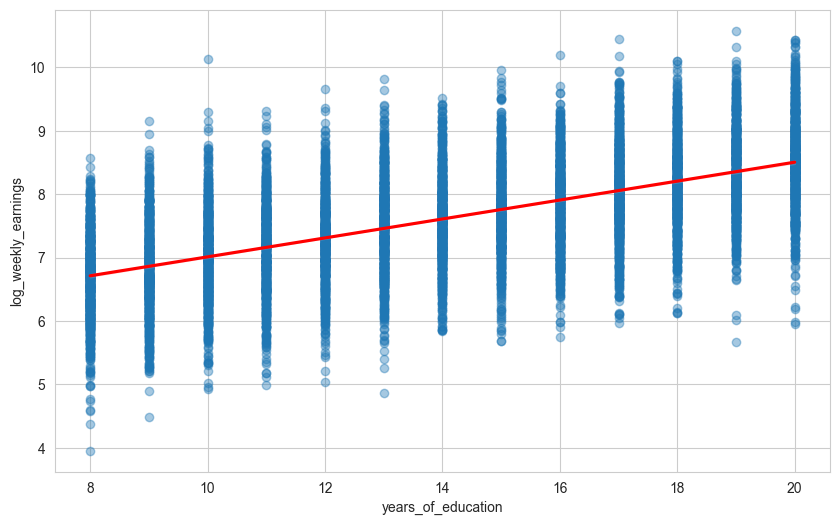

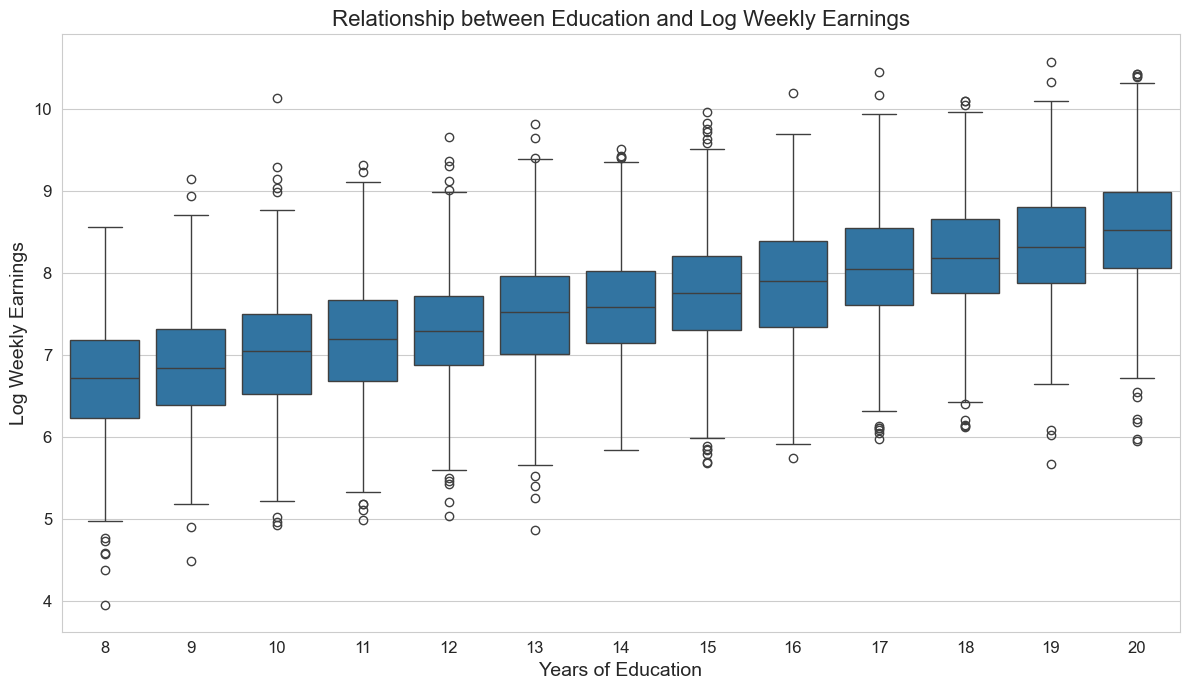

In [9]:
# Set up the plot style
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Create a scatter plot with jitter
sns.regplot(x='years_of_education', y='log_weekly_earnings', data=df, 
           scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})

# Add a boxplot to show the distribution at each education level
plt.figure(figsize=(12, 7))
sns.boxplot(x='years_of_education', y='log_weekly_earnings', data=df)

# Add title and labels
plt.title('Relationship between Education and Log Weekly Earnings', fontsize=16)
plt.xlabel('Years of Education', fontsize=14)
plt.ylabel('Log Weekly Earnings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

## Summary Statistics

Let's calculate some summary statistics for our simulated data.

In [10]:
# Summary statistics
print("Overall Summary:")
print(df.describe())

# Summary by education level
print("\nSummary by Education Level:")
education_summary = df.groupby('years_of_education')['log_weekly_earnings'].agg(['mean', 'std', 'min', 'max', 'count'])
print(education_summary)

Overall Summary:
       years_of_education  log_weekly_earnings
count         10000.00000         10000.000000
mean             14.08790             7.621393
std               3.76465             0.898056
min               8.00000             3.954320
25%              11.00000             7.006128
50%              14.00000             7.631206
75%              17.00000             8.229708
max              20.00000            10.580602

Summary by Education Level:
                        mean       std       min        max  count
years_of_education                                                
8                   6.704235  0.681919  3.954320   8.565230    773
9                   6.854414  0.710104  4.487095   9.151433    741
10                  7.028129  0.713389  4.922142  10.135359    753
11                  7.166643  0.703814  4.983998   9.317612    734
12                  7.291421  0.678247  5.030940   9.664168    726
13                  7.500257  0.716646  4.868144   9.814438   

## Save Data to CSV

Now we'll save the simulated data to static/data.csv for use in visualizations.

In [11]:
# Calculate actual weekly earnings (exp of log earnings)
df['weekly_earnings'] = np.exp(df['log_weekly_earnings'])

# Add some additional metadata (for demonstrative purposes)
df['id'] = np.arange(1, n+1)
df['gender'] = np.random.choice(['Male', 'Female'], size=n)
df['age'] = np.random.randint(25, 65, size=n)

# Path to save the CSV file
csv_path = 'static/data.csv'

# Save the DataFrame to CSV
df.to_csv(csv_path, index=False)

print(f"Data saved to {csv_path}")
print(f"Total rows: {len(df)}")
print(f"Columns: {', '.join(df.columns)}")

Data saved to static/data.csv
Total rows: 10000
Columns: years_of_education, log_weekly_earnings, weekly_earnings, id, gender, age
